In [ ]:
!pip install recommenders[examples]
!pip install seaborn
!pip install scikit-learn

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from setup import USER_COL, ITEM_COL, RATING_COL, PREDICTION_COL
from utils import plot_sparse
from utils import sparse_ind
from sklearn.preprocessing import LabelEncoder

user_col = USER_COL
item_col = ITEM_COL
rating_col = RATING_COL
pred_col = PREDICTION_COL

In [24]:
df = pd.read_csv("data/personalize.zip", compression="zip").iloc[:, :3]
genres = pd.read_csv("data/genres.zip", compression="zip")

## EDA

In [25]:
genres.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
df[item_col].nunique(), df[user_col].nunique()

(1682, 943)

In [27]:
df.head()

,UserId,MovieId,Rating
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [28]:
sparse_ind(df)

0.937

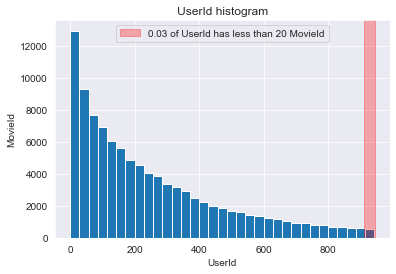

In [29]:
plot_sparse(df[user_col], bins=33, MIN_ITEMS=20, y=ITEM_COL)

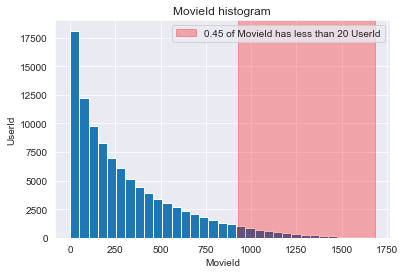

In [30]:
plot_sparse(df[item_col], bins=33, MIN_ITEMS=20, y=USER_COL)

## Preprocessing

In [ ]:
from utils import reduce_sparsity

df = reduce_sparsity(df, min_shows_per_user=20, min_user_per_show=20)

In [31]:
sparse_ind(df)

0.937

In [ ]:
u_transf = LabelEncoder()
item_transf = LabelEncoder()
df[user_col] = u_transf.fit_transform(df[user_col])
df[item_col] = item_transf.fit_transform(df[item_col])

## Train

In [ ]:
!python run.py

## Evaluate

In [ ]:
import json
import pandas as pd

with open("outputs/metrics.json", "r") as f:
    metrics = json.load(f)

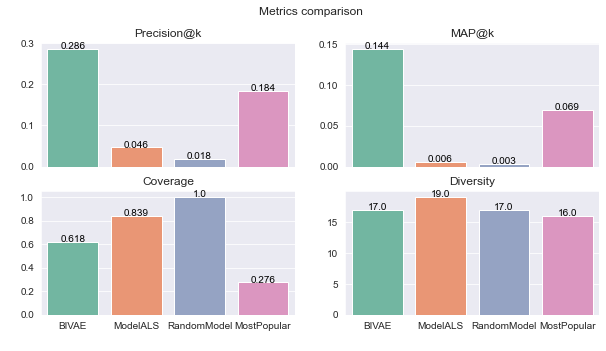

In [23]:
from utils import plot_metrics

plot_metrics(metrics)

In [10]:
preds = pd.read_csv("outputs/BIVAE_preds.csv")

In [ ]:
preds[item_col] = item_transf.inverse_transform(preds[item_col])
preds[user_col] = u_transf.inverse_transform(preds[user_col])

In [11]:
preds.head()

,UserId,MovieId,prediction,genres
0,943,82,0.923711,Comedy|Drama
1,943,222,0.912872,Drama|Romance
2,943,96,0.909460,Comedy|Drama
3,943,568,0.908613,Comedy|Drama
4,943,228,0.905622,Comedy
